In [8]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.benchmarks import *

from pymanopt.manifolds import Stiefel

In [9]:
m = 500
n = 500
r = 10
c = 2
alpha = 1
s = round(alpha*n*r)
N = 1000

alpha = s/(n*r)
print(s)
print(alpha)

5000
1.0


In [10]:
struct_s = np.repeat(round(s/r), r)
subspace0, q0 = GenerateQSMat1((n,r), struct_s)

sparsities = np.count_nonzero(q0, 0)
# Signal strength
theta = np.linspace(5, 2, num = r) # np.zeros((r,)) #
theta = np.diag(theta)
samples = np.random.multivariate_normal(np.zeros((n,)), np.eye(n) + 5*q0 @ q0.T, N).T
#covariance matrix = samples @ samples.T / N
A = LinearMatrix(samples.T / np.sqrt(N))
A = LinearMatrix(samples @ samples.T / N)

In [11]:
lam = n
print(lam)
problem = SparsePrincipalSubspace(A, rank = r, sparsity=s)
problem.objective(q0)

500


380.44374863597926

In [12]:
#HTr = FixedRank(r)
#subspaces,_ = HTr.project(A._matrix)
#HTso = SparseOblique(struct_s)
#_, x0 = HTso.project_quasi(subspaces[1])
manifold = Stiefel(n, r)
x0 = manifold.rand()

In [16]:
params_ospca = {'lam' : lam}
solver_lf = LandingField(logverbosity = 2, maxiter = 100, stepsize_type = 'safeguard')
solver_ospca = ObliqueSPCA(logverbosity = 2, maxiter = 1000)

In [20]:
manifold = Stiefel(n, r)
x0 = manifold.rand()
subspace, x_ospca, opt_log_ospca = solver_lf.solve(problem=problem, x = x0)

 iter		   obj. value	    grad. norm	    reg. norm	 iter. lsearch
    1	+5.3784174019219654e+02	1.96626453e+01	1.99863930e-30	    1
    2	+5.0300729095209846e+02	4.39736662e+01	1.41311584e-02	    1
    3	+4.7358694301328853e+02	5.36815475e+01	2.45662518e-02	    1
    4	+4.4313532017234854e+02	5.22912920e+01	1.50211499e-02	    1
    5	+4.1967529382444218e+02	4.91344308e+01	1.41477290e-02	    1
    6	+4.0488695979921806e+02	4.13995920e+01	9.44017100e-03	    1
    7	+3.9406304288537558e+02	3.40727535e+01	4.98210521e-03	    1
    8	+3.8446892762793448e+02	3.03144956e+01	3.40895396e-03	    1
    9	+3.7732886777616159e+02	2.71017741e+01	3.79771931e-03	    1
   10	+3.7376265540758646e+02	2.15183327e+01	2.66404173e-03	    1
   11	+3.7201609722637193e+02	1.56701030e+01	9.22073811e-04	    1
   12	+3.7054304454350114e+02	1.25273548e+01	2.70340548e-04	    1
   13	+3.6879811643513733e+02	1.21504063e+01	2.27159678e-04	    1
   14	+3.6664803443273780e+02	1.30474593e+01	3.68006791e-04	    1
   15	+3.64

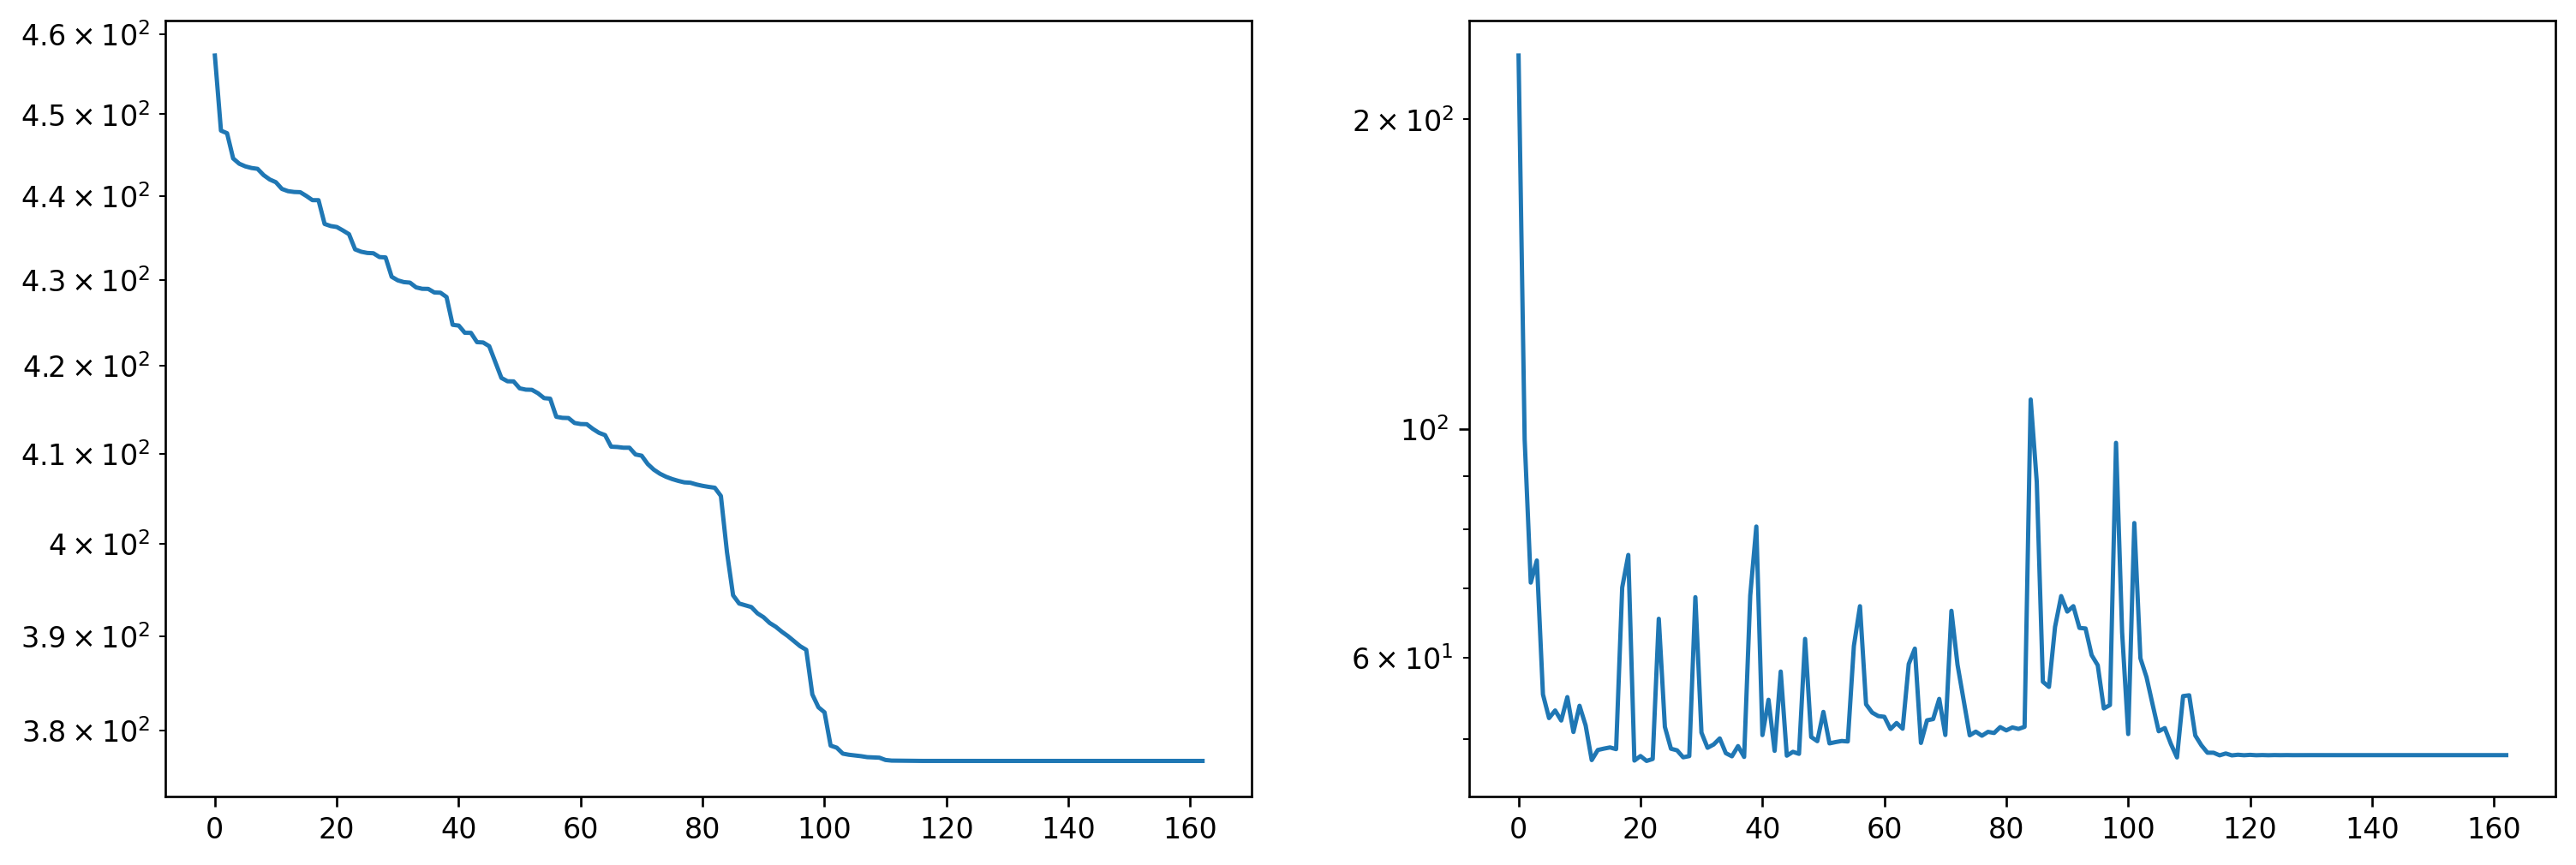

In [14]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15, 5)
fig.set_dpi(240)
im1=axs[0].semilogy(opt_log_ospca['iterations']['fx'])
im2=axs[1].semilogy(opt_log_ospca['iterations']['gradnorm'])

In [8]:
subspace, x_lf, opt_log_lf = solver_lf.solve(problem=problem, lam=1, x=x0)

 iter		   obj. value	    grad. norm	    reg. norm	 iter. lsearch
    1	+7.1737434736001285e+02	2.32848100e+01	8.90927693e-31	  101
    2	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    3	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    4	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    5	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    6	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    7	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    8	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
    9	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
   10	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
   11	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
   12	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
   13	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
   14	+7.1737434736001285e+02	1.72437654e+01	7.73716511e-01	  101
   15	+7.17

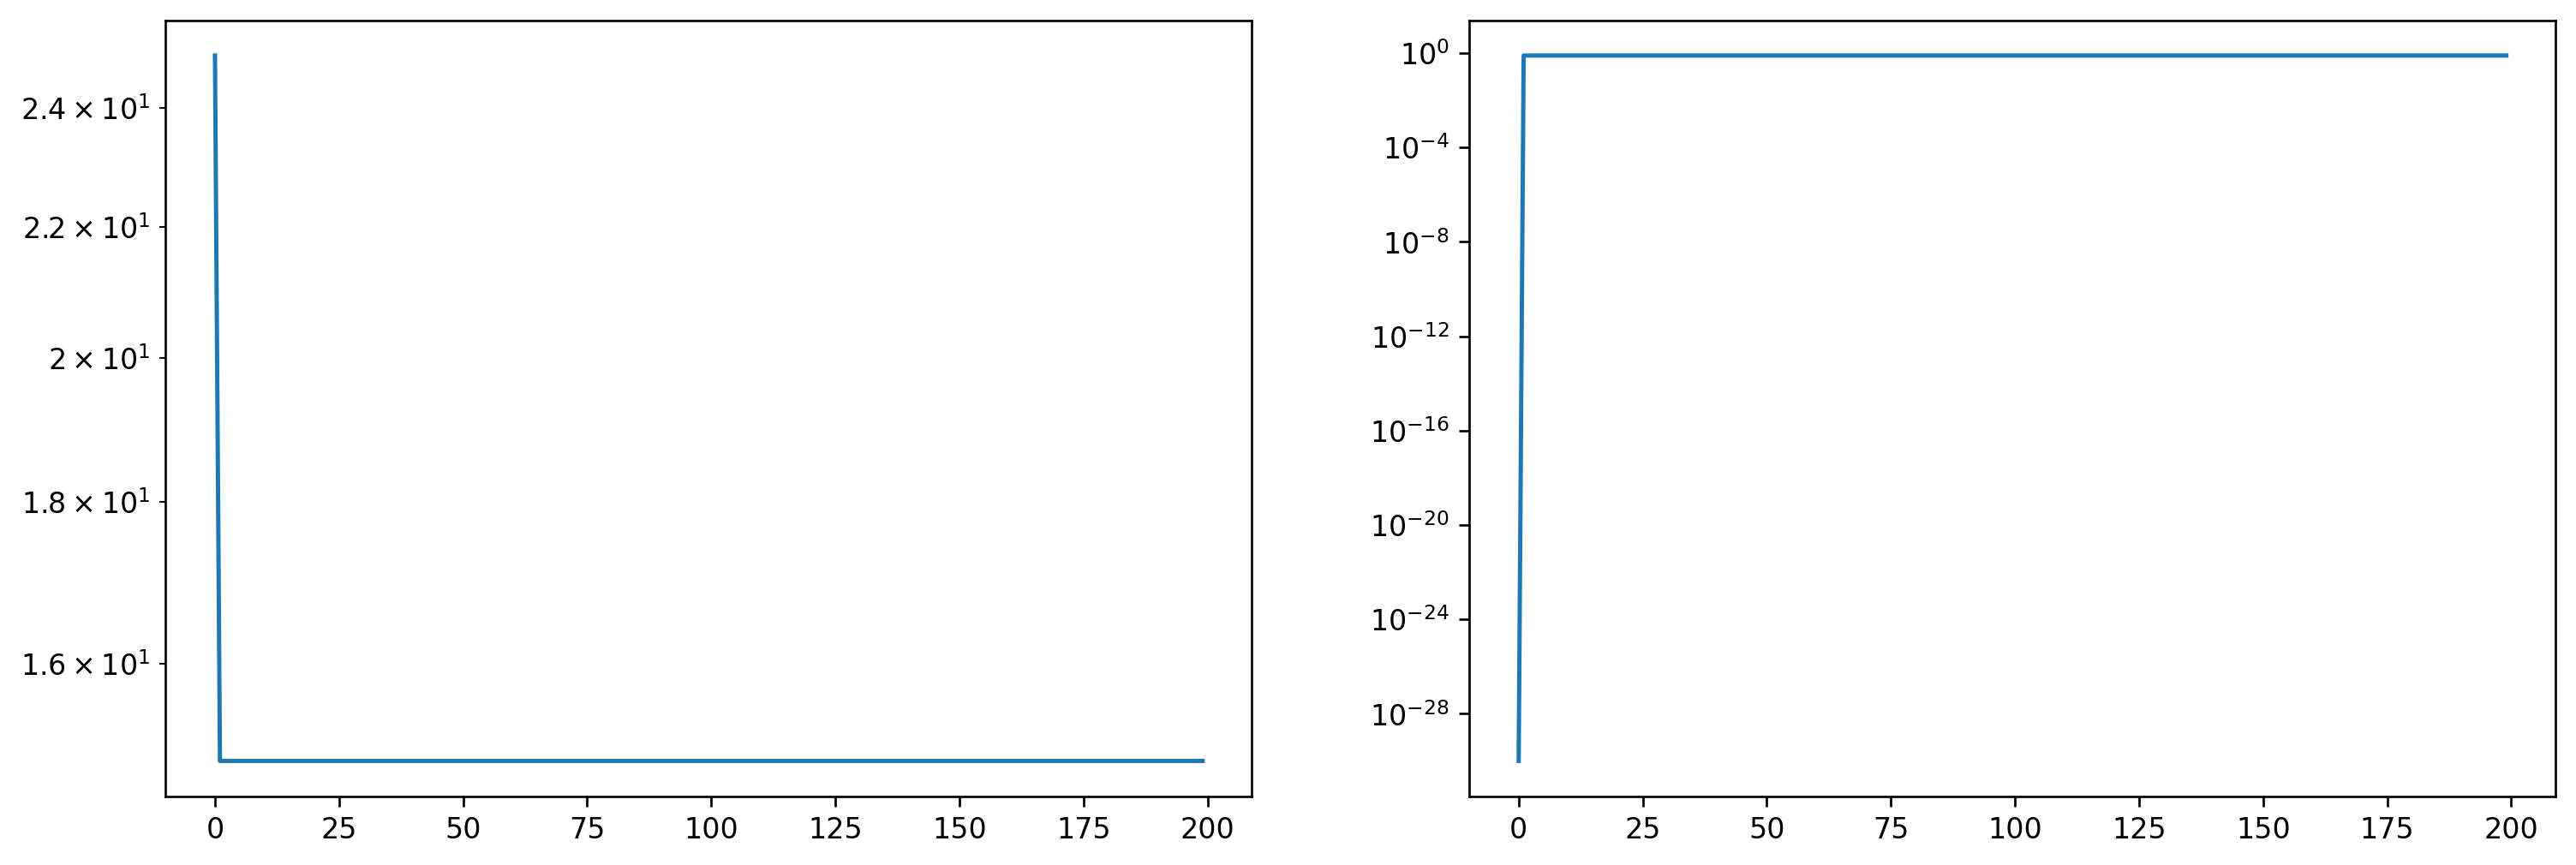

In [24]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15, 5)
fig.set_dpi(240)
im1=axs[0].semilogy(opt_log_lf['iterations']['gradnorm'])
im2=axs[1].semilogy(opt_log_lf['iterations']['regnorm'])

In [12]:
subspace, x_ospca, opt_log_ospca = solver_ospca.solve(problem=problem, lam=lam, x0=x0)

 iter		   obj. value	    grad. norm	     iter. lsearch	     stepsize
    1	+7.2764080007390919e+02	1.46108238e+01 	   101 	 7.8886e-31
Terminated - min stepsize reached after 1 iterations, 0.11 seconds.



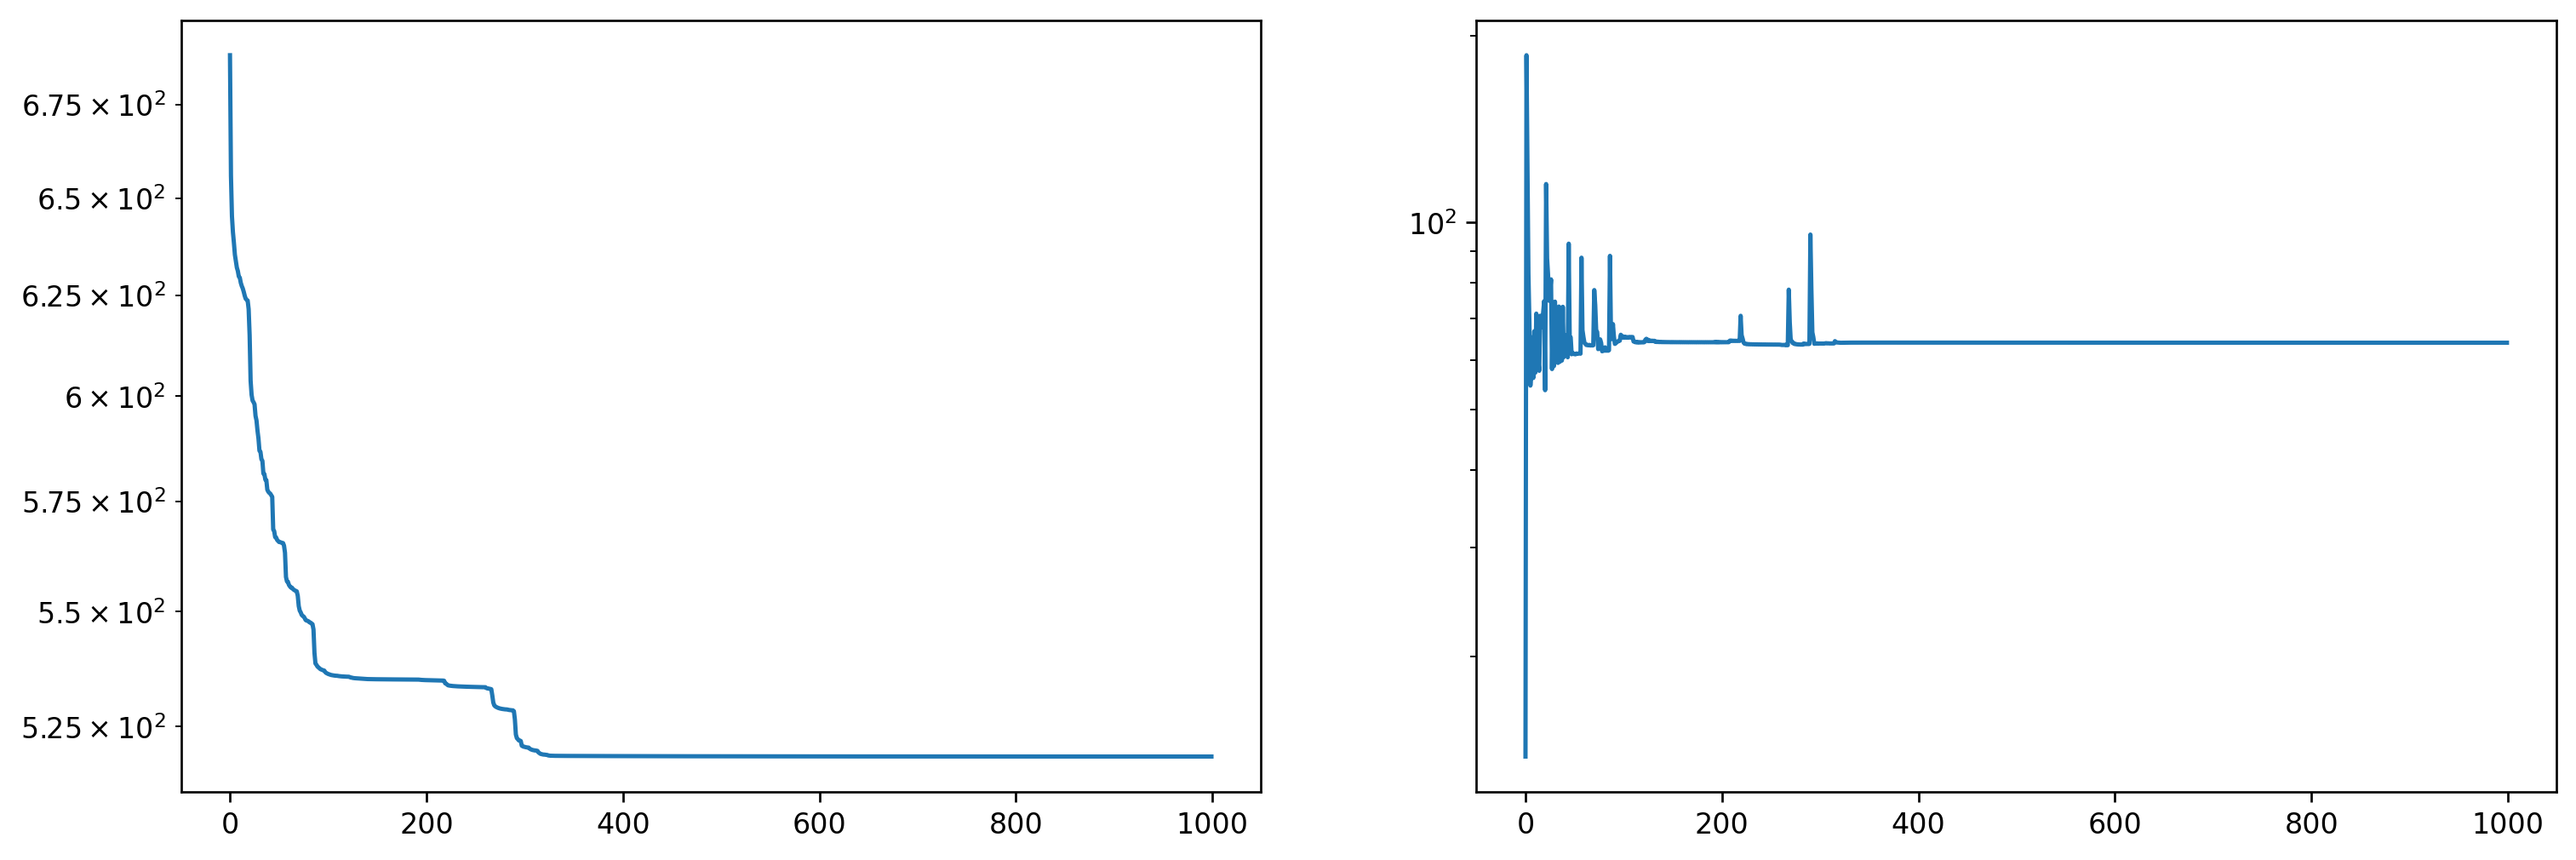

In [27]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(15, 5)
fig.set_dpi(240)
im1=axs[0].semilogy(opt_log_ospca['iterations']['fx'])
im2=axs[1].semilogy(opt_log_ospca['iterations']['gradnorm'])
#im2=axs[2].semilogy(opt_log_ospca['iterations']['dist_x_true'])
#im2=axs[3].semilogy(opt_log_ospca['iterations']['gradnorm'])

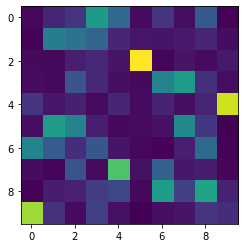

In [46]:
plt.imshow(np.abs(q0.T @ x_lf))

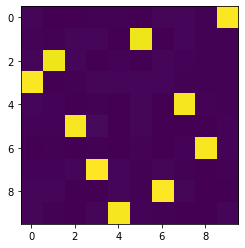

In [47]:
plt.imshow(np.abs(x_ospca.T @ q0))